# Bike rental count prediction

In [3]:
import pandas as pd          
import numpy as np 
import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs 


In [4]:
df = pd.read_csv("day.csv")

In [5]:
df.shape

(731, 16)

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Rename the columns

In [8]:
df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

Missing value analysis

In [9]:
df.isnull()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [11]:
df.drop(["datetime"],axis=1, inplace=True)

In [12]:
df.head()

,rec_id,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
df.columns

Index(['rec_id', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_condition', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'total_count'],
      dtype='object')

In [14]:
# Check the  Statistical Numerical Data Distribution Summary
df.describe()

,rec_id,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
# the correlation between the columns 
df.corr()

,rec_id,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
rec_id,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
year,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
month,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weather_condition,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


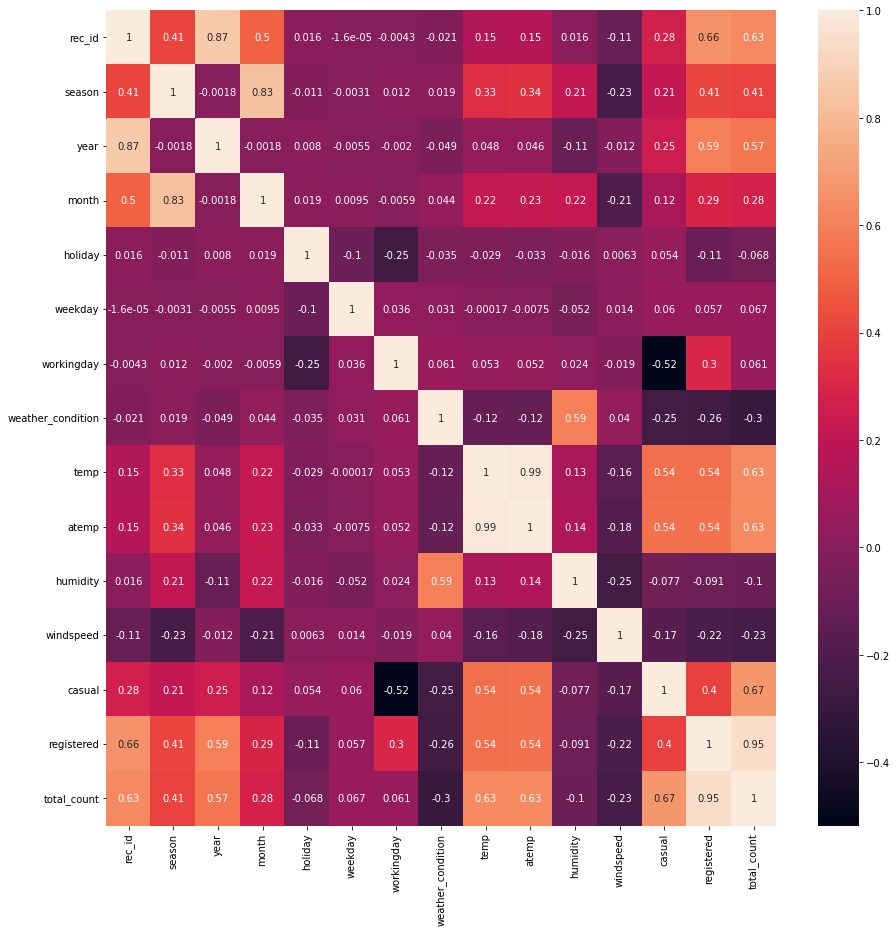

In [16]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

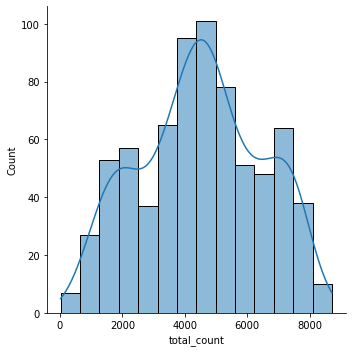

In [17]:
# distplot
sns.displot(df['total_count'],kde=True)

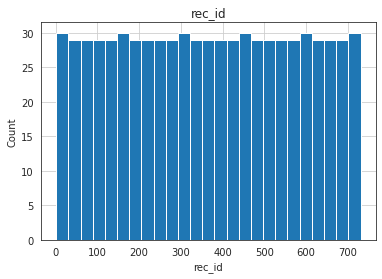

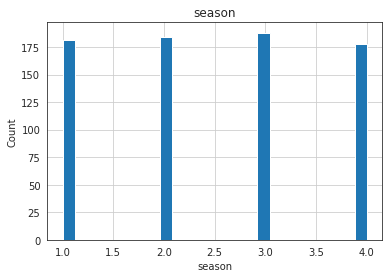

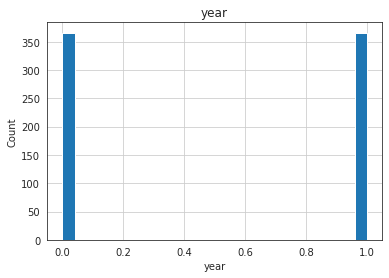

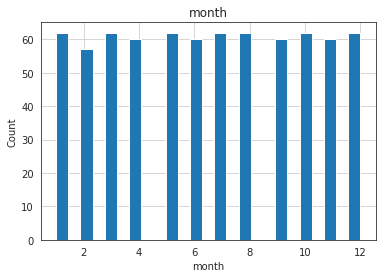

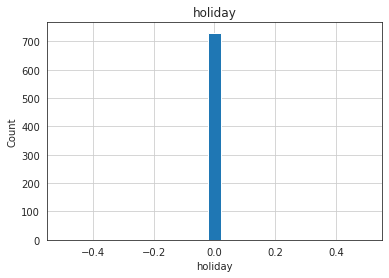

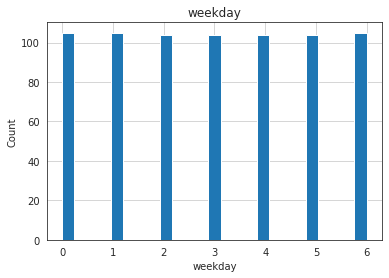

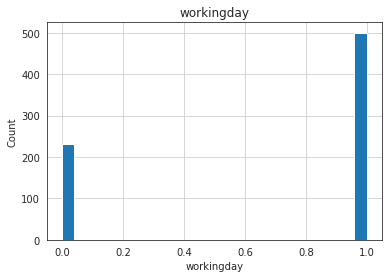

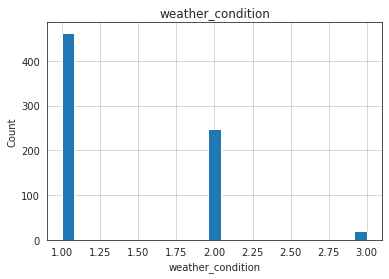

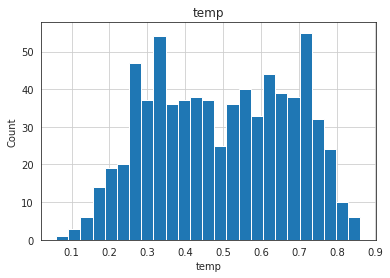

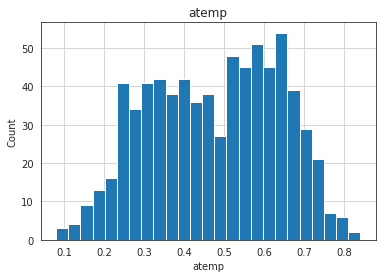

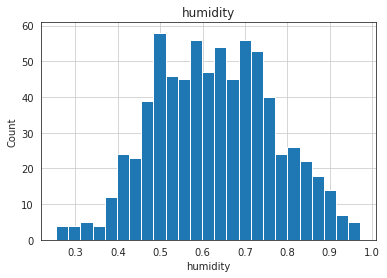

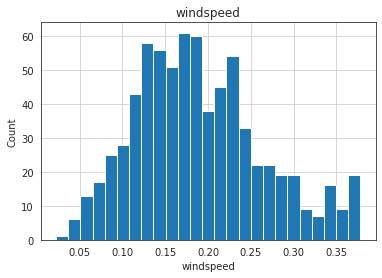

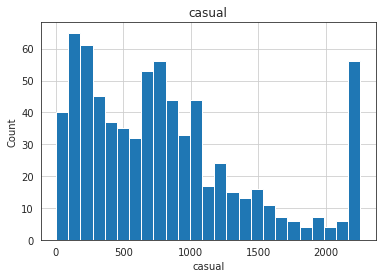

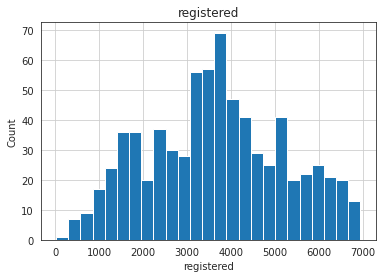

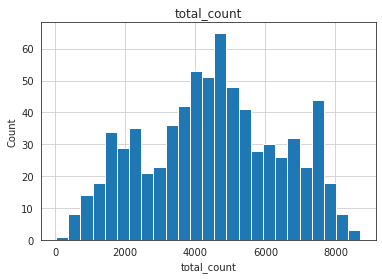

In [44]:
##  analysing the continuous values by creating histograms to understand the distribution

for feature in df.columns:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


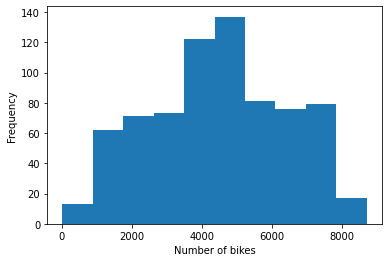

In [18]:
# histogram
plt.hist(df["total_count"])
plt.xlabel("Number of bikes")
plt.ylabel("Frequency")
plt.show()

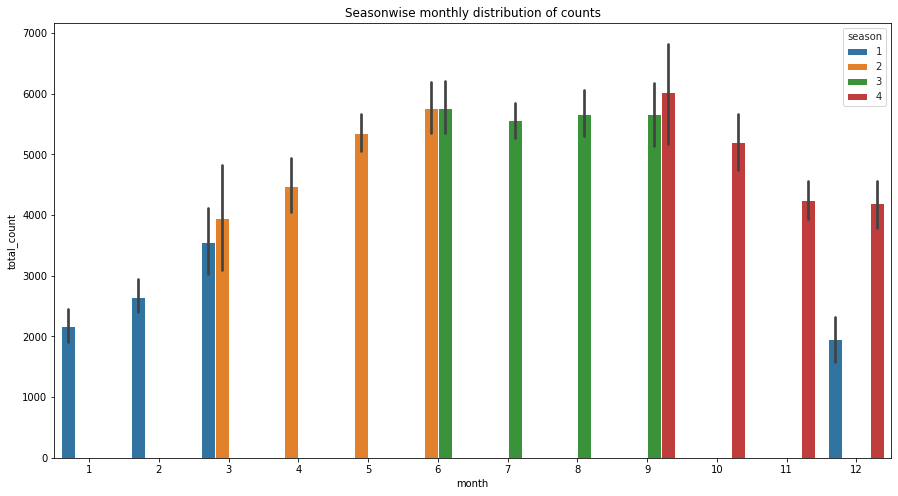

In [19]:
#Bar plot for seasonwise monthly distribution of counts

fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
sns.barplot(x='month',y='total_count',data=df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

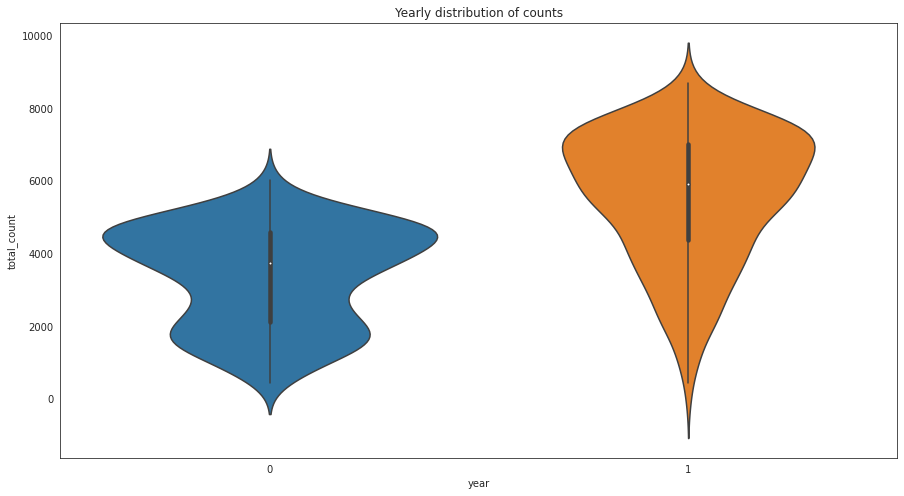

In [20]:
#Violin plot for yearly distribution of counts

fig,ax=plt.subplots(figsize=(15,8))
sns.violinplot(x='year',y='total_count',data=df[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()


In [21]:
columns=['rec_id', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_condition', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'total_count']
columns

['rec_id',
 'season',
 'year',
 'month',
 'holiday',
 'weekday',
 'workingday',
 'weather_condition',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'total_count']

rec_id
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([183.5,   1. ]), array([548.5, 731. ])]

caps: [array([1., 1.]), array([731., 731.])]

boxes: [array([183.5, 183.5, 548.5, 548.5, 183.5])]

medians: [array([366., 366.])]

fliers: [array([], dtype=int64)]

means: []



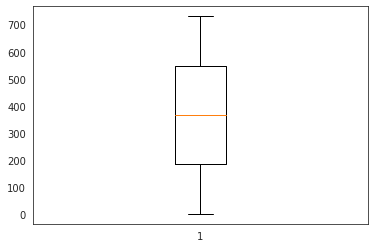

******************************************************************************************
season
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([2., 1.]), array([3., 4.])]

caps: [array([1., 1.]), array([4., 4.])]

boxes: [array([2., 2., 3., 3., 2.])]

medians: [array([3., 3.])]

fliers: [array([], dtype=int64)]

means: []



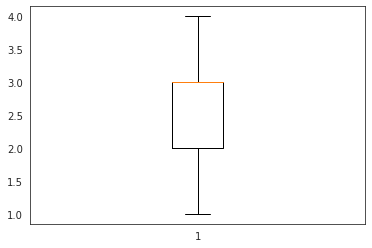

******************************************************************************************
year
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([1., 1.])]

caps: [array([0., 0.]), array([1., 1.])]

boxes: [array([0., 0., 1., 1., 0.])]

medians: [array([1., 1.])]

fliers: [array([], dtype=int64)]

means: []



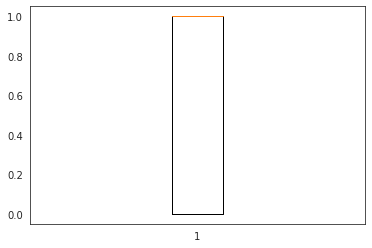

******************************************************************************************
month
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([4., 1.]), array([10., 12.])]

caps: [array([1., 1.]), array([12., 12.])]

boxes: [array([ 4.,  4., 10., 10.,  4.])]

medians: [array([7., 7.])]

fliers: [array([], dtype=int64)]

means: []



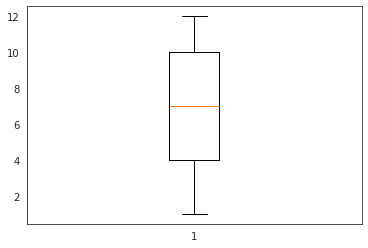

******************************************************************************************
holiday
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0., 0.]), array([0., 0.])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]

means: []



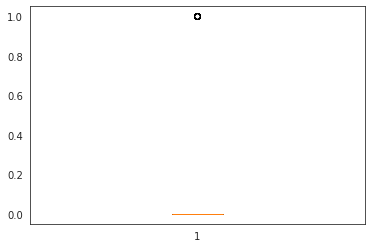

******************************************************************************************
weekday
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([1., 0.]), array([5., 6.])]

caps: [array([0., 0.]), array([6., 6.])]

boxes: [array([1., 1., 5., 5., 1.])]

medians: [array([3., 3.])]

fliers: [array([], dtype=int64)]

means: []



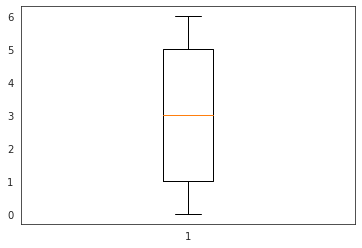

******************************************************************************************
workingday
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([1., 1.])]

caps: [array([0., 0.]), array([1., 1.])]

boxes: [array([0., 0., 1., 1., 0.])]

medians: [array([1., 1.])]

fliers: [array([], dtype=int64)]

means: []



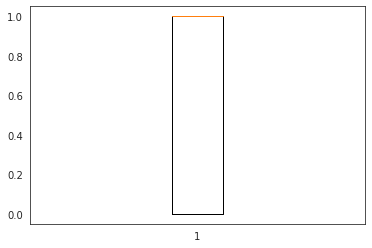

******************************************************************************************
weather_condition
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([1., 1.]), array([2., 3.])]

caps: [array([1., 1.]), array([3., 3.])]

boxes: [array([1., 1., 2., 2., 1.])]

medians: [array([1., 1.])]

fliers: [array([], dtype=int64)]

means: []



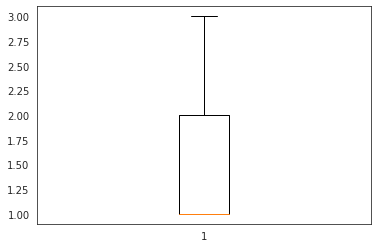

******************************************************************************************
temp
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0.3370835, 0.0591304]), array([0.6554165, 0.861667 ])]

caps: [array([0.0591304, 0.0591304]), array([0.861667, 0.861667])]

boxes: [array([0.3370835, 0.3370835, 0.6554165, 0.6554165, 0.3370835])]

medians: [array([0.498333, 0.498333])]

fliers: [array([], dtype=float64)]

means: []



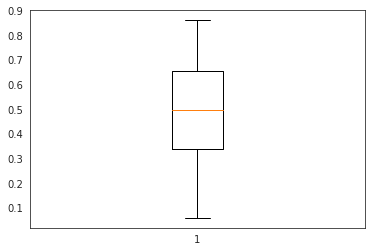

******************************************************************************************
atemp
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0.3378425, 0.0790696]), array([0.608602, 0.840896])]

caps: [array([0.0790696, 0.0790696]), array([0.840896, 0.840896])]

boxes: [array([0.3378425, 0.3378425, 0.608602 , 0.608602 , 0.3378425])]

medians: [array([0.486733, 0.486733])]

fliers: [array([], dtype=float64)]

means: []



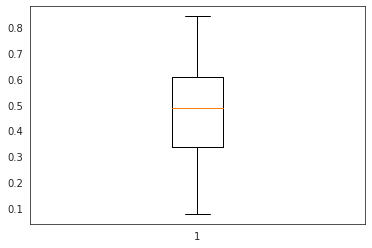

******************************************************************************************
humidity
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0.52    , 0.254167]), array([0.7302085, 0.9725   ])]

caps: [array([0.254167, 0.254167]), array([0.9725, 0.9725])]

boxes: [array([0.52     , 0.52     , 0.7302085, 0.7302085, 0.52     ])]

medians: [array([0.626667, 0.626667])]

fliers: [array([0.187917, 0.      ])]

means: []



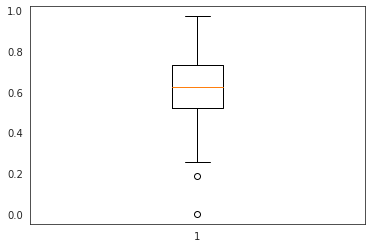

******************************************************************************************
windspeed
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0.13495  , 0.0223917]), array([0.2332145, 0.378108 ])]

caps: [array([0.0223917, 0.0223917]), array([0.378108, 0.378108])]

boxes: [array([0.13495  , 0.13495  , 0.2332145, 0.2332145, 0.13495  ])]

medians: [array([0.180975, 0.180975])]

fliers: [array([0.417908, 0.507463, 0.385571, 0.388067, 0.422275, 0.415429,
       0.409212, 0.421642, 0.441563, 0.4148  , 0.386821, 0.398008,
       0.407346])]

means: []



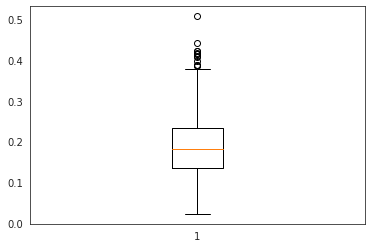

******************************************************************************************
casual
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([315.5,   2. ]), array([1096., 2258.])]

caps: [array([2., 2.]), array([2258., 2258.])]

boxes: [array([ 315.5,  315.5, 1096. , 1096. ,  315.5])]

medians: [array([713., 713.])]

fliers: [array([2355, 2282, 3065, 2418, 2521, 2397, 3155, 2469, 2301, 2347, 3252,
       2795, 2846, 2541, 2496, 2622, 3410, 2704, 2855, 3283, 2557, 2795,
       2494, 2708, 2963, 2634, 2657, 2551, 2562, 2355, 2544, 2345, 2827,
       2352, 2613, 2570, 3160, 2512, 2454, 2589, 3031, 2806, 2643, 2290])]

means: []



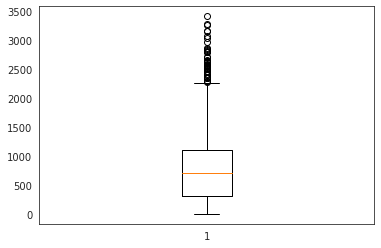

******************************************************************************************
registered
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([2497.,   20.]), array([4776.5, 6946. ])]

caps: [array([20., 20.]), array([6946., 6946.])]

boxes: [array([2497. , 2497. , 4776.5, 4776.5, 2497. ])]

medians: [array([3662., 3662.])]

fliers: [array([], dtype=int64)]

means: []



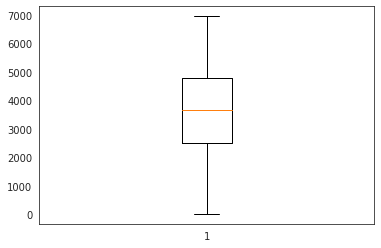

******************************************************************************************
total_count
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([3152.,   22.]), array([5956., 8714.])]

caps: [array([22., 22.]), array([8714., 8714.])]

boxes: [array([3152., 3152., 5956., 5956., 3152.])]

medians: [array([4548., 4548.])]

fliers: [array([], dtype=int64)]

means: []



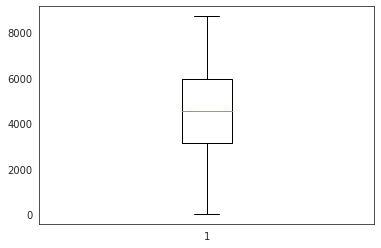

******************************************************************************************


In [22]:
for col in columns:
    print(col)
    bp=plt.boxplot(df[col], showcaps=True)
    print(bp.keys())
    for key in bp:
        print(f'{key}: {[item.get_ydata() for item in bp[key]]}\n')
    plt.show()
    print('***'*30)

In [23]:
df['casual']=np.where(df['casual']>2258.0, 2258.0, df['casual'])

df['windspeed']=np.where(df['windspeed']>0.378108, 0.378108, df['windspeed'])

df['humidity']=np.where(df['humidity']<0.254167, 0.254167, df['humidity'])

df['holiday']=np.where(df['holiday']>0.0,0.0, df['holiday'])

rec_id
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([183.5,   1. ]), array([548.5, 731. ])]

caps: [array([1., 1.]), array([731., 731.])]

boxes: [array([183.5, 183.5, 548.5, 548.5, 183.5])]

medians: [array([366., 366.])]

fliers: [array([], dtype=int64)]

means: []



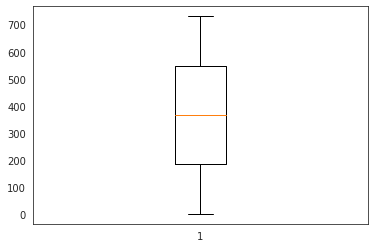

******************************************************************************************
season
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([2., 1.]), array([3., 4.])]

caps: [array([1., 1.]), array([4., 4.])]

boxes: [array([2., 2., 3., 3., 2.])]

medians: [array([3., 3.])]

fliers: [array([], dtype=int64)]

means: []



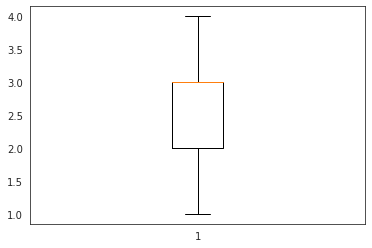

******************************************************************************************
year
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([1., 1.])]

caps: [array([0., 0.]), array([1., 1.])]

boxes: [array([0., 0., 1., 1., 0.])]

medians: [array([1., 1.])]

fliers: [array([], dtype=int64)]

means: []



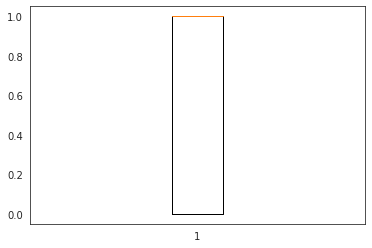

******************************************************************************************
month
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([4., 1.]), array([10., 12.])]

caps: [array([1., 1.]), array([12., 12.])]

boxes: [array([ 4.,  4., 10., 10.,  4.])]

medians: [array([7., 7.])]

fliers: [array([], dtype=int64)]

means: []



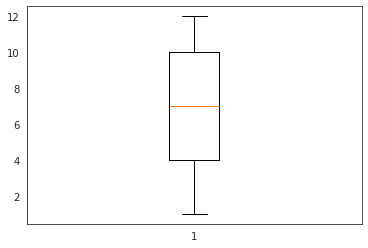

******************************************************************************************
holiday
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([0., 0.])]

caps: [array([0., 0.]), array([0., 0.])]

boxes: [array([0., 0., 0., 0., 0.])]

medians: [array([0., 0.])]

fliers: [array([], dtype=float64)]

means: []



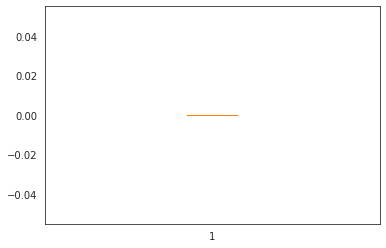

******************************************************************************************
weekday
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([1., 0.]), array([5., 6.])]

caps: [array([0., 0.]), array([6., 6.])]

boxes: [array([1., 1., 5., 5., 1.])]

medians: [array([3., 3.])]

fliers: [array([], dtype=int64)]

means: []



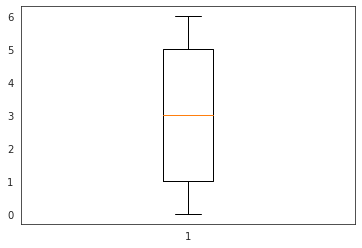

******************************************************************************************
workingday
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0., 0.]), array([1., 1.])]

caps: [array([0., 0.]), array([1., 1.])]

boxes: [array([0., 0., 1., 1., 0.])]

medians: [array([1., 1.])]

fliers: [array([], dtype=int64)]

means: []



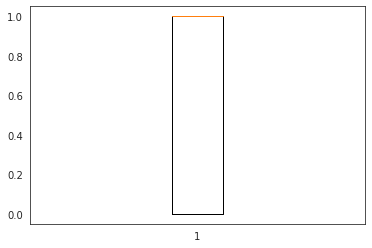

******************************************************************************************
weather_condition
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([1., 1.]), array([2., 3.])]

caps: [array([1., 1.]), array([3., 3.])]

boxes: [array([1., 1., 2., 2., 1.])]

medians: [array([1., 1.])]

fliers: [array([], dtype=int64)]

means: []



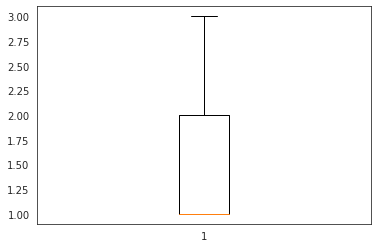

******************************************************************************************
temp
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0.3370835, 0.0591304]), array([0.6554165, 0.861667 ])]

caps: [array([0.0591304, 0.0591304]), array([0.861667, 0.861667])]

boxes: [array([0.3370835, 0.3370835, 0.6554165, 0.6554165, 0.3370835])]

medians: [array([0.498333, 0.498333])]

fliers: [array([], dtype=float64)]

means: []



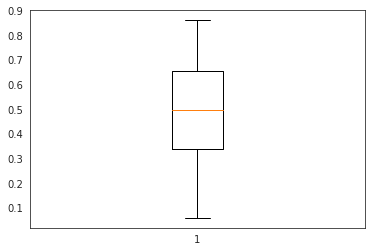

******************************************************************************************
atemp
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0.3378425, 0.0790696]), array([0.608602, 0.840896])]

caps: [array([0.0790696, 0.0790696]), array([0.840896, 0.840896])]

boxes: [array([0.3378425, 0.3378425, 0.608602 , 0.608602 , 0.3378425])]

medians: [array([0.486733, 0.486733])]

fliers: [array([], dtype=float64)]

means: []



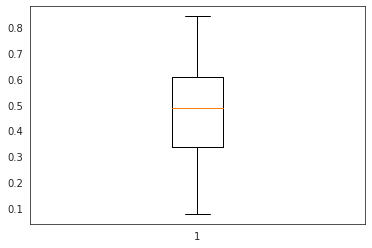

******************************************************************************************
humidity
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0.52    , 0.254167]), array([0.7302085, 0.9725   ])]

caps: [array([0.254167, 0.254167]), array([0.9725, 0.9725])]

boxes: [array([0.52     , 0.52     , 0.7302085, 0.7302085, 0.52     ])]

medians: [array([0.626667, 0.626667])]

fliers: [array([], dtype=float64)]

means: []



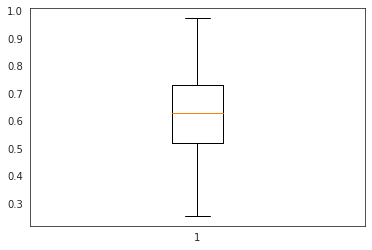

******************************************************************************************
windspeed
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([0.13495  , 0.0223917]), array([0.2332145, 0.378108 ])]

caps: [array([0.0223917, 0.0223917]), array([0.378108, 0.378108])]

boxes: [array([0.13495  , 0.13495  , 0.2332145, 0.2332145, 0.13495  ])]

medians: [array([0.180975, 0.180975])]

fliers: [array([], dtype=float64)]

means: []



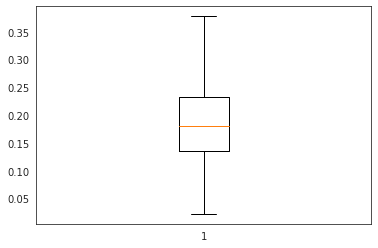

******************************************************************************************
casual
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([315.5,   2. ]), array([1096., 2258.])]

caps: [array([2., 2.]), array([2258., 2258.])]

boxes: [array([ 315.5,  315.5, 1096. , 1096. ,  315.5])]

medians: [array([713., 713.])]

fliers: [array([], dtype=float64)]

means: []



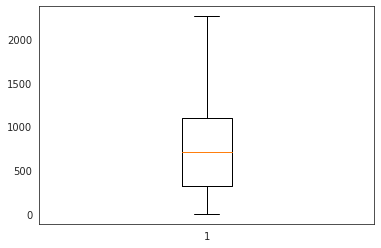

******************************************************************************************
registered
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([2497.,   20.]), array([4776.5, 6946. ])]

caps: [array([20., 20.]), array([6946., 6946.])]

boxes: [array([2497. , 2497. , 4776.5, 4776.5, 2497. ])]

medians: [array([3662., 3662.])]

fliers: [array([], dtype=int64)]

means: []



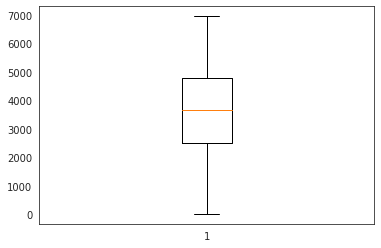

******************************************************************************************
total_count
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([3152.,   22.]), array([5956., 8714.])]

caps: [array([22., 22.]), array([8714., 8714.])]

boxes: [array([3152., 3152., 5956., 5956., 3152.])]

medians: [array([4548., 4548.])]

fliers: [array([], dtype=int64)]

means: []



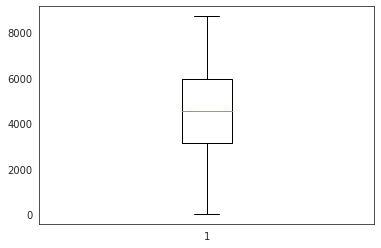

******************************************************************************************


In [24]:
for col in columns:
    print(col)
    bp=plt.boxplot(df[col], showcaps=True)
    print(bp.keys())
    for key in bp:
        print(f'{key}: {[item.get_ydata() for item in bp[key]]}\n')
    plt.show()
    print('***'*30)

In [25]:
df.shape

(731, 15)

Modelling

In [89]:
column_s = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_condition', 'temp', 'humidity', 'windspeed', 'casual',
       'registered']
X = df.loc[:, column_s]
y = df.iloc[:, -1]
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Standardize the data using the scaler
X_scaled = scaler.transform(X)


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)
X_train.head(10)

,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,casual,registered
223,3,0,8,0.0,5,1,1,0.708333,0.415000,0.125621,1051.0,3854
684,4,1,11,0.0,4,1,2,0.321667,0.620417,0.152987,320.0,5125
685,4,1,11,0.0,5,1,1,0.345000,0.524583,0.171025,484.0,5214
163,2,0,6,0.0,1,1,1,0.635000,0.494583,0.305350,863.0,4157
394,1,1,1,0.0,1,1,1,0.269167,0.400833,0.215792,126.0,3498
641,4,1,10,0.0,3,1,2,0.657500,0.793750,0.066546,728.0,6844
490,2,1,5,0.0,6,0,2,0.621667,0.756667,0.152992,2258.0,4387
390,1,1,1,0.0,4,1,2,0.341667,0.769583,0.073396,244.0,3831
371,1,1,1,0.0,6,0,1,0.393333,0.531667,0.174758,1070.0,3451
334,4,0,12,0.0,4,1,1,0.312500,0.524583,0.220158,182.0,3545


In [91]:
# Importing the standardscaler package for standardization

from sklearn.preprocessing import StandardScaler

In [92]:
#define the model
model = RandomForestRegressor(n_estimators=1000, criterion='squared_error', max_depth=None, random_state=0)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [99]:
model.score(X_train,y_train)

0.9992615958478945

In [93]:
Y_pred = model.predict(X_test)

Y_pred

array([6635.733, 1548.072, 3739.225, 6362.626, 7602.479, 7340.047,
       1602.024, 2172.977, 7591.797, 5870.294, 1827.9  , 3114.191,
       4879.885, 5464.091, 2185.902, 2306.856, 2140.268, 7925.632,
       5321.705, 2328.609, 7499.989, 5554.569, 5261.082, 1896.584,
       1898.5  , 5090.696, 2129.149, 7461.694, 3937.424, 5616.976,
       2768.14 , 3623.644, 6182.928, 7475.961, 6004.496, 3503.331,
       7484.957, 5996.14 , 2681.277, 1363.998, 3943.811, 4024.502,
       7450.22 , 4935.426, 6895.391,  712.392, 4431.179, 5432.221,
       6293.575, 4898.098, 3192.858, 2440.34 , 1043.772, 4411.959,
       4737.871, 4732.829, 2419.708, 3395.427, 4813.147, 6997.173,
       6247.831, 7489.554, 1518.5  , 7768.472, 6659.855, 6233.639,
       7435.658, 4229.432, 2019.887, 7076.85 , 3121.3  , 1315.737,
       3840.985, 4612.827, 4401.884, 2145.158, 5641.862, 4750.614,
       1465.64 , 4401.686, 2095.951, 2005.713, 5673.858,  534.357,
       4060.223, 4097.851, 5414.517, 1227.008, 3616.827, 3407.

In [94]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(RandomForestRegressor(),X_test,y_test,cv=cv)

array([0.99092598, 0.98240159, 0.98933622, 0.96358446, 0.97303612])

In [95]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, Y_pred)

mse

10221.242595068183

In [96]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, Y_pred)

mae

67.07791363636365

In [102]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, Y_pred)

print(r2)

0.9974311812672865


In [104]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,Y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,Y_pred))

print('RMsE :'," ", np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))

MAE :   67.07791363636365
MSE :   10221.242595068183
RMsE :   101.10016120198911
